# Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/Users/estep/anaconda3/Lib/site-packages/pyswmm')
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments, Nodes
import os
import swmmio as sio

ModuleNotFoundError: No module named 'pyswmm'

# SUBBASIN DICTIONARIES (Dictionaries will be referenced throughout the code)

In [ ]:
#Subbasin LID Feasble Area Dictionaries
raingarden_feasible_areas = {'72591': 55583.9368, '72631': 19815.3296, '72671': 44162.83, '72731': 21000.83666, '72781': 23024.24035, '72951': 43306.46711, '73081': 13920.64411, '73121': 23892.97048, '73171': 0.0, '73181': 3385.30813, '73201': 9353.089577, '73211': 12806.63365, '73301': 636.1767258, '73321': 671.0354, '73391': 9520.57, '73421': 0.0, '73461': 5787.304599, '73531': 20854.943, '73551': 11511.16, '73571': 8611.12}
permeablepavement_feasible_areas = {'72591': 0.0, '72631': 3592.054222, '72671': 0.0, '72731': 9935.438827, '72781': 12553.53077, '72951': 14386.89196, '73081': 9687.51, '73121': 12827.45501, '73171': 9776.734992, '73181': 7534.73, '73201': 30138.92, '73211': 1076.39, '73301': 17222.24, '73321': 6647.736192, '73391': 1076.39, '73421': 7345.333808, '73461': 25833.36, '73531': 32600.9754, '73551': 0.0, '73571': 20832.98346}
greenroof_feasible_areas = {'72591': 2152.78, '72631': 12921.38023, '72671': 1173.503467, '72731': 29062.53, '72781': 7534.73, '72951': 9687.51, '73081': 21384.84111, '73121': 9357.285313, '73171': 16289.43527, '73181': 6990.681118, '73201': 30615.11554, '73211': 1296.256317, '73301': 16630.5235, '73321': 26148.32693, '73391': 0.0, '73421': 20630.7033, '73461': 71257.33823, '73531': 52908.96152, '73551': 10049.59107, '73571': 37450.83357}
bioretention_feasible_areas = {'72591': 1076.39, '72631': 1076.39, '72671': 1076.39, '72731': 3229.17, '72781': 7.996802699, '72951': 1068.393197, '73081': 0.0, '73121': 5381.95, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73301': 0.0, '73321': 0.0, '73391': 1076.39, '73421': 0.0, '73461': 0.0, '73531': 1076.39, '73551': 0.0, '73571': 4305.56}
grassswale_feasible_areas = {'73081': 7534.73, '72671': 0.0, '72591': 2152.78, '72631': 3229.17, '72781': 0.0, '72731': 0.0, '72951': 10763.9, '73211': 0.0, '73181': 0.0, '73171': 0.0, '73121': 2152.78, '73201': 0.0, '73301': 0.0, '73321': 0.0, '73391': 10096.5382, '73461': 0.0, '73421': 0.0, '73551': 0.0, '73531': 0.0, '73571': 5177.4359}

#Other LID Dictionaries
raingarden_standard_surfaceareas = {'72591': 616.6014319, '72631': 871.622691, '72671': 699.6268099, '72731': 762.1321942, '72781': 695.4204566, '72951': 567.673537, '73081': 765.5796487, '73121': 816.0431198, '73171': 913.0600918, '73181': 1017.27915, '73201': 936.7333456, '73211': 598.6061559, '73301': 950.2543445, '73321': 1105.661561, '73391': 677.1456018, '73421': 1137.466808, '73461': 1138.968494, '73531': 1058.328457, '73551': 1058.44356, '73571': 1112.715481}
bioretention_standard_surfaceareas = {'72591': 3212.817987, '72631': 4541.612969, '72671': 3645.423904, '72731': 3971.109854, '72781': 3623.50659, '72951': 2957.877903, '73081': 3989.072906, '73121': 4252.014151, '73171': 4757.523636, '73181': 5300.559781, '73201': 4880.873748, '73211': 3119.053128, '73301': 4951.325269, '73321': 5761.078663, '73391': 3528.284978, '73421': 5926.800739, '73461': 5934.625311, '73531': 5514.448276, '73551': 5515.048024, '73571': 5797.833294}
grassswale_standard_surfaceareas = {'72591': 7460.877325, '72631': 10546.63456, '72671': 8465.4844, '72731': 9221.799549, '72781': 8414.587525, '72951': 6868.849797, '73081': 9263.513749, '73121': 9874.12175, '73171': 11048.02711, '73181': 12309.07771, '73201': 11334.47348, '73211': 7243.134487, '73301': 11498.07757, '73321': 13378.50489, '73391': 8193.461781, '73421': 13763.34838, '73461': 13781.51878, '73531': 12805.77433, '73551': 12807.16708, '73571': 13463.85732}


#Other Subbasin Characteristic Dictionaries
subbasin_areas = {'72591': 930398.04, '72631': 952047.36, '72671': 1011681.0, '72731': 954530.28, '72781': 1649965.68, '72951': 1785524.4, '73081': 1531569.6, '73121': 1481911.2, '73171': 677488.68, '73181': 626044.32, '73201': 922731.48, '73211': 1332718.2, '73301': 1379980.8, '73321': 629311.32, '73391': 762430.68, '73421': 672827.76, '73461': 708067.8, '73531': 677662.92, '73551': 603218.88, '73571': 368648.28}
subbasin_imperv_areas = {'72591': 230720.106, '72631': 418386.7328, '72671': 294287.8861, '72731': 506340.1323, '72781': 530480.4658, '72951': 419348.2606, '73081': 545667.6171, '73121': 717393.2119, '73171': 390782.2455, '73181': 431162.9836, '73201': 494805.5288, '73211': 431094.3562, '73301': 632569.3989, '73321': 437044.1255, '73391': 164067.458, '73421': 504230.5799, '73461': 532764.3741, '73531': 469972.7883, '73551': 412975.7096, '73571': 253029.1199}
subbasin_perv_areas = {'72591': 699677.934, '72631': 533660.6272, '72671': 717393.1139, '72731': 448190.1477, '72781': 1119485.214, '72951': 1366176.139, '73081': 985901.9829, '73121': 764517.9881, '73171': 286706.4345, '73181': 194881.3364, '73201': 427925.9512, '73211': 901623.8438, '73301': 747411.4011, '73321': 192267.1945, '73391': 598363.222, '73421': 168597.1801, '73461': 175303.4259, '73531': 207690.1317, '73551': 190243.1704, '73571': 115619.1601}
subbasin_flowlengths = {'72591': 1094.586, '72631': 793.373, '72671': 1445.259, '72731': 1272.707, '72781': 1833.295, '72951': 915.654, '73081': 957.231, '73121': 4234.032, '73171': 615.899, '73181': 2086.814, '73201': 1419.587, '73211': 1665.898, '73301': 2759.962, '73321': 968.171, '73391': 476.519, '73421': 480.591, '73461': 708.068, '73531': 1042.558, '73551': 928.029, '73571': 1053.281}


# LID Area Scenario Generator. Can only run one of these. Must Comment out the option that isnt being used!

## Option 1: Manually Change in Block Below

In [ ]:
# raingarden_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# permeablepavement_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# greenroof_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# bioretention_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}
# grassswale_assigned_areas = {'72591': None, '72631': None, '72671': None, '72731': None, '72781': None, '72951': None, '73081': None, '73121': None, '73171': None, '73181': None, '73201': None, '73211': None, '73301': None, '73321': None, '73391': None, '73421': None, '73461': None, '73531': None, '73551': None, '73571': None}

## Option 2: Random LID Area allocation

In [ ]:
#UPDATED BY EMMA 3/28/21
#changed to set assigned areas dictionary equal to feasible areas outside of loop, otherwise every area except the last will be the same

In [ ]:
#Generating random area allocation scenarios for each subcatchment. 
### Random LID scenario generator.  

allocations_fractions_list = [1]

raingarden_assigned_areas = raingarden_feasible_areas

for key in raingarden_feasible_areas:
    raingarden_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
greenroof_assigned_areas = greenroof_feasible_areas

for key in greenroof_feasible_areas:
    greenroof_assigned_areas[key] *= random.choice(allocations_fractions_list)

permeablepavement_assigned_areas = permeablepavement_feasible_areas
    
for key in permeablepavement_feasible_areas:
    permeablepavement_assigned_areas[key] *= random.choice(allocations_fractions_list)

bioretention_assigned_areas = bioretention_feasible_areas

for key in bioretention_feasible_areas:
    bioretention_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
grassswale_assigned_areas = grassswale_feasible_areas

for key in grassswale_feasible_areas:
    grassswale_assigned_areas[key] *= random.choice(allocations_fractions_list)



In [ ]:
#print(raingarden_feasible_areas)
print(permeablepavement_assigned_areas)

# Calculating LID Costs

In [ ]:
#calculating costs for different LID scenarios
#output is a dictionary listing each subbasin and the cost for a given type of LID 
#ASSUMING that the impervious area of a subbasin treated by a type of LID is the fraction of feasible area being used
#NEED TO VERIFY THIS ASSUMPTION

raingarden_costs = {}

for key in raingarden_assigned_areas:
    fraction_LID = raingarden_assigned_areas[key] / raingarden_feasible_areas[key]
    fraction_IMP_treated = fraction_LID * subbasin_imperv_areas[key]
#constant used below is the unit cost per m2 of bioretention (assuming that rain gardens are small bioretention)
    raingarden_cost = 16.70274201 * fraction_IMP_treated
    raingarden_costs[key] = raingarden_cost

permeablepavement_costs = {}
#need to check LID control parameters to determine cost per m2

greenroof_costs = {}
#need to check LID control parameters to determine cost per m2

bioretention_costs = {}

for key in bioretention_assigned_areas:
    fraction_LID = bioretention_assigned_areas[key] / bioretention_feasible_areas[key]
    fraction_IMP_treated = fraction_LID * subbasin_imperv_areas[key]
    bioretention_cost = 16.70274201 * fraction_IMP_treated
    bioretention_costs[key] = bioretention_cost
    
grassswale_costs = {}

for key in grassswale_assigned_areas:
    fraction_LID = grassswale_assigned_areas[key] / grassswale_feasible_areas[key]
    fraction_IMP_treated = fraction_LID * subbasin_imperv_areas [key]
    grassswale_cost = 6.941856155 * fraction_IMP_treated
    grassswale_costs[key] = grassswale_cost
    
total_GI_costs = {}

# use of rain garden dictionary is arbitrary, any dictionary with the subbasins as keys could be used here 
for key in raingarden_assigned_areas:
    total_cost = raingarden_costs[key] + permeablepavement_costs[key] + greenroof_costs[key] + bioretention_costs[key] + grassswale_costs[key]
    total_GI_costs[key] = total_cost
    
print(raingarden_costs)
print(permeablepavement_costs)
print(greenroof_costs)
print(bioretention_costs)
print(grassswale_costs)
print(total_GI_costs)

# Calculate total implemented LID areas for each subbasin

In [ ]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
lid_total_areas = dict.fromkeys(subbasinlist)

for key in lid_total_areas:
    lid_total_areas[key] = greenroof_assigned_areas[key] + permeablepavement_assigned_areas[key] + raingarden_assigned_areas[key] + bioretention_assigned_areas[key] + grassswale_assigned_areas[key]

print(lid_total_areas)

### Update impervious LID areas for each subbasin after LID implementation
### This block appears periodically to reset the updated subbasin impervious area dictionary

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

# Permeable Pavement LID Usage Editor Parameter Changes!
## Permeable Pavement Percent Impervious Treated Calculation for each Subbasin

In [ ]:
permeablepavement_percimpervtreated = subbasindict

for key in permeablepavement_percimpervtreated:
    permeablepavement_percimpervtreated[key] = ((permeablepavement_assigned_areas[key] * 2.5) / updated_sb_impervious_areas[key])*100
print(permeablepavement_percimpervtreated)    

# RainGarden LID Usage Editor Parameter Changes!

## Percent of Impervious Area Treated Calculations for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

In [ ]:
raingarden_impervareatreated = subbasindict

for key in raingarden_impervareatreated:
    quarter = 0.25
    raingarden_impervareatreated[key] = totaldrainageareatreated[key] * quarter
print(raingarden_impervareatreated)

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
raingarden_percimpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percimpervareatreated[key] = (raingarden_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(raingarden_percimpervareatreated)

In [ ]:
for key in raingarden_percimpervareatreated:
    if raingarden_percimpervareatreated[key] > 100:
        raingarden_percimpervareatreated[key] = 100
print(raingarden_percimpervareatreated)

## Calculations for RainGarden Percent Pervious Area Treated for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

In [ ]:
raingarden_pervareatreated = subbasindict

for key in raingarden_pervareatreated:
    threequarter = 0.75
    raingarden_pervareatreated[key] = totaldrainageareatreated[key] * threequarter
print(raingarden_pervareatreated)

In [ ]:
raingarden_percpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percpervareatreated[key] = (raingarden_pervareatreated[key]/subbasin_perv_areas[key])*100
print(raingarden_percpervareatreated)

In [ ]:
for key in raingarden_percpervareatreated:
    if raingarden_percpervareatreated[key] > 100:
        raingarden_percpervareatreated[key] = 100
print(raingarden_percpervareatreated)

# Bioretention LID Usage Editor Parameter Changes!

## Percent of Impervious Area Treated Calculations for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

In [ ]:
bioretention_impervareatreated = subbasindict

for key in bioretention_impervareatreated:
    bioretention_impervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_impervareatreated)

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
bioretention_percimpervareatreated = subbasindict

for key in bioretention_percimpervareatreated:
    bioretention_percimpervareatreated[key] = (bioretention_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(bioretention_percimpervareatreated)

In [ ]:
for key in bioretention_percimpervareatreated:
    if bioretention_percimpervareatreated[key] > 100:
        bioretention_percimpervareatreated[key] = 100
print(bioretention_percimpervareatreated)

## Bioretention Percent Pervious Area Treated for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

In [ ]:
bioretention_pervareatreated = subbasindict

for key in bioretention_pervareatreated:
    bioretention_pervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_pervareatreated)

In [ ]:
bioretention_percpervareatreated = subbasindict

for key in bioretention_percpervareatreated:
    bioretention_percpervareatreated[key] = (bioretention_pervareatreated[key]/subbasin_perv_areas[key])*100
print(bioretention_percpervareatreated)

In [ ]:
for key in bioretention_percpervareatreated:
    if bioretention_percpervareatreated[key] > 100:
        bioretention_percpervareatreated[key] = 100
print(bioretention_percpervareatreated)

# Grass Swale LID Usage Editor Parameter Changes!

## Percent of Impervious Area Treated Calculations for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (grassswale_assigned_areas[key] / grassswale_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

In [ ]:
grassswale_impervareatreated = subbasindict

for key in grassswale_impervareatreated:
    grassswale_impervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(grassswale_impervareatreated)

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
grassswale_percimpervareatreated = subbasindict

for key in grassswale_percimpervareatreated:
    grassswale_percimpervareatreated[key] = (grassswale_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(grassswale_percimpervareatreated)

In [ ]:
for key in grassswale_percimpervareatreated:
    if grassswale_percimpervareatreated[key] > 100:
        grassswale_percimpervareatreated[key] = 100
print(grassswale_percimpervareatreated)

## Percent of pervious Area Treated Calculations for each Subbasin

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (grassswale_assigned_areas[key] / grassswale_standard_surfaceareas[key])
print(totalunits)

In [ ]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

In [ ]:
grassswale_pervareatreated = subbasindict

for key in grassswale_pervareatreated:
    grassswale_pervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(grassswale_pervareatreated)

In [ ]:
grassswale_percpervareatreated = subbasindict

for key in grassswale_percpervareatreated:
    grassswale_percpervareatreated[key] = (grassswale_pervareatreated[key]/subbasin_perv_areas[key])*100
print(grassswale_percpervareatreated)

In [ ]:
for key in grassswale_percimpervareatreated:
    if grassswale_percimpervareatreated[key] > 100:
        grassswale_percimpervareatreated[key] = 100
print(grassswale_percpervareatreated)

## Capping total %impervious and %pervious at 100% for each subcatchment-LID combo. 

In [ ]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
percimptreated_sbs = dict.fromkeys(subbasinlist)

for key in percimptreated_sbs:
    percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
print(percimptreated_sbs)  

In [ ]:
while percimptreated_sbs['72671'] > 100:
    raingarden_percimpervareatreated['72671'] =  raingarden_percimpervareatreated['72671']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


In [ ]:
subbasinlist = ['72591', '72631', '72671', '72731', '72781', '72951', '73081','73121','73171','73181', '73201', '73211', '73301', '73321', '73391', '73421', '73461', '73531', '73551','73571']
percpervtreated_sbs = dict.fromkeys(subbasinlist)

for key in percpervtreated_sbs:
    percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key]
print(percpervtreated_sbs)  

In [ ]:
while percpervtreated_sbs['73571'] > 100:
    raingarden_percpervareatreated['73571'] =  raingarden_percpervareatreated['73571']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
    


In [ ]:
while percpervtreated_sbs['72591'] > 100:
    raingarden_percpervareatreated['72591'] =  raingarden_percpervareatreated['72591']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)


In [ ]:
while percimptreated_sbs['72591'] > 100:
    raingarden_percimpervareatreated['72591'] =  raingarden_percimpervareatreated['72591']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


In [ ]:
while percimptreated_sbs['72951'] > 100:
    raingarden_percimpervareatreated['72951'] =  raingarden_percimpervareatreated['72951']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)


In [ ]:
while percimptreated_sbs['73391'] > 100:
    raingarden_percimpervareatreated['73391'] =  raingarden_percimpervareatreated['73391']-0.25
    for key in percimptreated_sbs:
        percimptreated_sbs[key] = raingarden_percimpervareatreated[key] + bioretention_percimpervareatreated[key] + permeablepavement_percimpervtreated[key] + grassswale_percimpervareatreated[key]
        
print(percimptreated_sbs)

In [ ]:
while percpervtreated_sbs['72951'] > 100:
    raingarden_percpervareatreated['72951'] =  raingarden_percpervareatreated['72951']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)


In [ ]:
while percpervtreated_sbs['72731'] > 100:
    raingarden_percpervareatreated['72731'] =  raingarden_percpervareatreated['72731']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

In [ ]:
while percpervtreated_sbs['73531'] > 100:
    raingarden_percpervareatreated['73531'] =  raingarden_percpervareatreated['73531']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

In [ ]:
while percpervtreated_sbs['72671'] > 100:
    raingarden_percpervareatreated['72671'] =  raingarden_percpervareatreated['72671']-0.25
    for key in percpervtreated_sbs:
        percpervtreated_sbs[key] = raingarden_percpervareatreated[key] + bioretention_percpervareatreated[key] + grassswale_percpervareatreated[key] 
print(percpervtreated_sbs)

# The following blocks update subcatchment percent impervious and widths using SWMMIO 

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

In [ ]:
print(subbasin_areas)

In [ ]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_percent_impervious_areas = subbasindict
for key in updated_sb_percent_impervious_areas:
    updated_sb_percent_impervious_areas[key] = (updated_sb_impervious_areas[key] / subbasin_areas[key])*100
print(updated_sb_percent_impervious_areas)

In [ ]:
#initialize a baseline model object in swmmio
baseline = sio.Model(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\Meadow_Creek_Hydrology_Model_UpdatedMar2021.inp')

#isolate subcatchments dataframe
subcatchments = baseline.inp.subcatchments

#Set subcatchment parameters

#Percent Impervious Adjustments

subcatchments.loc['73081','PercImperv'] = updated_sb_impervious_areas['73081']
subcatchments.loc['72671','PercImperv'] = updated_sb_impervious_areas['72671']
subcatchments.loc['72591','PercImperv'] = updated_sb_impervious_areas['72591']
subcatchments.loc['72631','PercImperv'] = updated_sb_impervious_areas['72631']
subcatchments.loc['72781','PercImperv'] = updated_sb_impervious_areas['72781']
subcatchments.loc['72731','PercImperv'] = updated_sb_impervious_areas['72731']
subcatchments.loc['72951','PercImperv'] = updated_sb_impervious_areas['72951']
subcatchments.loc['73211','PercImperv'] = updated_sb_impervious_areas['73211']
subcatchments.loc['73181','PercImperv'] = updated_sb_impervious_areas['73181']
subcatchments.loc['73171','PercImperv'] = updated_sb_impervious_areas['73171']
subcatchments.loc['73121','PercImperv'] = updated_sb_impervious_areas['73121']
subcatchments.loc['73201','PercImperv'] = updated_sb_impervious_areas['73201']
subcatchments.loc['73301','PercImperv'] = updated_sb_impervious_areas['73301']
subcatchments.loc['73321','PercImperv'] = updated_sb_impervious_areas['73321']
subcatchments.loc['73391','PercImperv'] = updated_sb_impervious_areas['73391']
subcatchments.loc['73461','PercImperv'] = updated_sb_impervious_areas['73461']
subcatchments.loc['73551','PercImperv'] = updated_sb_impervious_areas['73551']
subcatchments.loc['73421','PercImperv'] = updated_sb_impervious_areas['73421']
subcatchments.loc['73531','PercImperv'] = updated_sb_impervious_areas['73531']
subcatchments.loc['73571','PercImperv'] = updated_sb_impervious_areas['73571']

#Width Adjustment((SUBBASIN AREA/Flow Length) - LID Width)

subcatchments.loc['73081','Width'] = ((subcatchments.loc['73081','Area'] * 43560)/subbasin_flowlengths['73081']) - (lid_total_areas['73081']/subbasin_flowlengths['73081'])
subcatchments.loc['72671','Width'] = ((subcatchments.loc['72671','Area'] * 43560)/subbasin_flowlengths['72671']) - (lid_total_areas['73461']/subbasin_flowlengths['72671'])
subcatchments.loc['72591','Width'] = ((subcatchments.loc['72591','Area'] * 43560)/subbasin_flowlengths['72591']) - (lid_total_areas['72591']/subbasin_flowlengths['72591'])
subcatchments.loc['72631','Width'] = ((subcatchments.loc['72631','Area'] * 43560)/subbasin_flowlengths['72631']) - (lid_total_areas['72631']/subbasin_flowlengths['72631'])
subcatchments.loc['72781','Width'] = ((subcatchments.loc['72781','Area'] * 43560)/subbasin_flowlengths['72781']) - (lid_total_areas['72781']/subbasin_flowlengths['72781'])
subcatchments.loc['72731','Width'] = ((subcatchments.loc['72731','Area'] * 43560)/subbasin_flowlengths['72731']) - (lid_total_areas['72731']/subbasin_flowlengths['72731'])
subcatchments.loc['72951','Width'] = ((subcatchments.loc['72951','Area'] * 43560)/subbasin_flowlengths['72951']) - (lid_total_areas['72951']/subbasin_flowlengths['72951'])
subcatchments.loc['73211','Width'] = ((subcatchments.loc['73211','Area'] * 43560)/subbasin_flowlengths['73211']) - (lid_total_areas['73211']/subbasin_flowlengths['73211'])
subcatchments.loc['73181','Width'] = ((subcatchments.loc['73181','Area'] * 43560)/subbasin_flowlengths['73181']) - (lid_total_areas['73181']/subbasin_flowlengths['73181'])
subcatchments.loc['73171','Width'] = ((subcatchments.loc['73171','Area'] * 43560)/subbasin_flowlengths['73171']) - (lid_total_areas['73171']/subbasin_flowlengths['73171'])
subcatchments.loc['73121','Width'] = ((subcatchments.loc['73121','Area'] * 43560)/subbasin_flowlengths['73121']) - (lid_total_areas['73121']/subbasin_flowlengths['73121'])
subcatchments.loc['73201','Width'] = ((subcatchments.loc['73201','Area'] * 43560)/subbasin_flowlengths['73201']) - (lid_total_areas['73201']/subbasin_flowlengths['73201'])
subcatchments.loc['73301','Width'] = ((subcatchments.loc['73301','Area'] * 43560)/subbasin_flowlengths['73301']) - (lid_total_areas['73301']/subbasin_flowlengths['73301'])
subcatchments.loc['73321','Width'] = ((subcatchments.loc['73321','Area'] * 43560)/subbasin_flowlengths['73321']) - (lid_total_areas['73321']/subbasin_flowlengths['73321'])
subcatchments.loc['73391','Width'] = ((subcatchments.loc['73391','Area'] * 43560)/subbasin_flowlengths['73391']) - (lid_total_areas['73391']/subbasin_flowlengths['73391'])
subcatchments.loc['73461','Width'] = ((subcatchments.loc['73461','Area'] * 43560)/subbasin_flowlengths['73461']) - (lid_total_areas['73461']/subbasin_flowlengths['73461'])
subcatchments.loc['73551','Width'] = ((subcatchments.loc['73551','Area'] * 43560)/subbasin_flowlengths['73551']) - (lid_total_areas['73551']/subbasin_flowlengths['73551'])
subcatchments.loc['73421','Width'] = ((subcatchments.loc['73421','Area'] * 43560)/subbasin_flowlengths['73421']) - (lid_total_areas['73421']/subbasin_flowlengths['73421'])
subcatchments.loc['73531','Width'] = ((subcatchments.loc['73531','Area'] * 43560)/subbasin_flowlengths['73531']) - (lid_total_areas['73531']/subbasin_flowlengths['73531'])
subcatchments.loc['73571','Width'] = ((subcatchments.loc['73571','Area'] * 43560)/subbasin_flowlengths['73571']) - (lid_total_areas['73571']/subbasin_flowlengths['73571'])

#save subcatchment dataframe changes to whole inp dataframe
baseline.inp.subcatchments = subcatchments

#create the new inp file to use. 
newfilepath = os.path.join(r"C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs", baseline.inp.name + "_" + 'Adjusted_SB_Parameters' + '.inp')
    
#Write the subcatchment section of the new model with the adjusted data

baseline.inp.save(newfilepath)

# 

# PYSWMM simulation with LID adjustments

In [ ]:
with Simulation(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.inp', reportfile = r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt') as sim:
    
    
    control_time_step = 86400*3
    sim.step_advance(control_time_step)
    
    
 #Load in subcatchment lid list
    
    lid_sub_73081 = LidGroups(sim)['73081']
    lid_sub_72671 = LidGroups(sim)['72671']
    lid_sub_72591 = LidGroups(sim)['72591']
    lid_sub_72631 = LidGroups(sim)['72631']
    lid_sub_72781 = LidGroups(sim)['72781']
    lid_sub_72731 = LidGroups(sim)['72731']
    lid_sub_72951 = LidGroups(sim)['72951']
    lid_sub_73211 = LidGroups(sim)['73211']
    lid_sub_73181 = LidGroups(sim)['73181']
    lid_sub_73171 = LidGroups(sim)['73171']
    lid_sub_73121 = LidGroups(sim)['73121']
    lid_sub_73201 = LidGroups(sim)['73201']
    lid_sub_73301 = LidGroups(sim)['73301']
    lid_sub_73321 = LidGroups(sim)['73321']
    lid_sub_73391 = LidGroups(sim)['73391']
    lid_sub_73461 = LidGroups(sim)['73461']
    lid_sub_73551 = LidGroups(sim)['73551']
    lid_sub_73421 = LidGroups(sim)['73421']
    lid_sub_73531 = LidGroups(sim)['73531']
    lid_sub_73571 = LidGroups(sim)['73571']
    
 #Set LID Areas!
    
    lid_sub_73081[0].unit_area = greenroof_assigned_areas['73081']
    lid_sub_73081[1].unit_area = permeablepavement_assigned_areas['73081']
    lid_sub_73081[2].unit_area = raingarden_assigned_areas['73081']
    lid_sub_73081[3].unit_area = bioretention_assigned_areas['73081']
    lid_sub_73081[4].unit_area = grassswale_assigned_areas['73081']
    
    lid_sub_72671[0].unit_area = greenroof_assigned_areas['72671']
    lid_sub_72671[1].unit_area = permeablepavement_assigned_areas['72671']
    lid_sub_72671[2].unit_area = raingarden_assigned_areas['72671']
    lid_sub_72671[3].unit_area = bioretention_assigned_areas['72671']
    lid_sub_72671[4].unit_area = grassswale_assigned_areas['72671']
    
    lid_sub_72591[0].unit_area = greenroof_assigned_areas['72591']
    lid_sub_72591[1].unit_area = permeablepavement_assigned_areas['72591']
    lid_sub_72591[2].unit_area = raingarden_assigned_areas['72591']
    lid_sub_72591[3].unit_area = bioretention_assigned_areas['72591']
    lid_sub_72591[4].unit_area = grassswale_assigned_areas['72591']
    
    lid_sub_72631[0].unit_area = greenroof_assigned_areas['72631']
    lid_sub_72631[1].unit_area = permeablepavement_assigned_areas['72631']
    lid_sub_72631[2].unit_area = raingarden_assigned_areas['72631']
    lid_sub_72631[3].unit_area = bioretention_assigned_areas['72631']
    lid_sub_72631[4].unit_area = grassswale_assigned_areas['72631']
    
    lid_sub_72781[0].unit_area = greenroof_assigned_areas['72781']
    lid_sub_72781[1].unit_area = permeablepavement_assigned_areas['72781']
    lid_sub_72781[2].unit_area = raingarden_assigned_areas['72781']
    lid_sub_72781[3].unit_area = bioretention_assigned_areas['72781']
    lid_sub_72781[4].unit_area = grassswale_assigned_areas['72781']
    
    lid_sub_72731[0].unit_area = greenroof_assigned_areas['72731']
    lid_sub_72731[1].unit_area = permeablepavement_assigned_areas['72731']
    lid_sub_72731[2].unit_area = raingarden_assigned_areas['72731']
    lid_sub_72731[3].unit_area = bioretention_assigned_areas['72731']
    lid_sub_72731[4].unit_area = grassswale_assigned_areas['72731']
    
    lid_sub_72951[0].unit_area = greenroof_assigned_areas['72951']
    lid_sub_72951[1].unit_area = permeablepavement_assigned_areas['72951']
    lid_sub_72951[2].unit_area = raingarden_assigned_areas['72951']
    lid_sub_72951[3].unit_area = bioretention_assigned_areas['72951']
    lid_sub_72951[4].unit_area = grassswale_assigned_areas['72951']
    
    lid_sub_73211[0].unit_area = greenroof_assigned_areas['73211']
    lid_sub_73211[1].unit_area = permeablepavement_assigned_areas['73211']
    lid_sub_73211[2].unit_area = raingarden_assigned_areas['73211']
    lid_sub_73211[3].unit_area = bioretention_assigned_areas['73211']
    lid_sub_73211[4].unit_area = grassswale_assigned_areas['73211']
    
    lid_sub_73181[0].unit_area = greenroof_assigned_areas['73181']
    lid_sub_73181[1].unit_area = permeablepavement_assigned_areas['73181']
    lid_sub_73181[2].unit_area = raingarden_assigned_areas['73181']
    lid_sub_73181[3].unit_area = bioretention_assigned_areas['73181']
    lid_sub_73181[4].unit_area = grassswale_assigned_areas['73181']
    
    lid_sub_73171[0].unit_area = greenroof_assigned_areas['73171']
    lid_sub_73171[1].unit_area = permeablepavement_assigned_areas['73171']
    lid_sub_73171[2].unit_area = raingarden_assigned_areas['73171']
    lid_sub_73171[3].unit_area = bioretention_assigned_areas['73171']
    lid_sub_73171[4].unit_area = grassswale_assigned_areas['73171']
    
    lid_sub_73121[0].unit_area = greenroof_assigned_areas['73121']
    lid_sub_73121[1].unit_area = permeablepavement_assigned_areas['73121']
    lid_sub_73121[2].unit_area = raingarden_assigned_areas['73121']
    lid_sub_73121[3].unit_area = bioretention_assigned_areas['73121']
    lid_sub_73121[4].unit_area = grassswale_assigned_areas['73121']
    
    lid_sub_73201[0].unit_area = greenroof_assigned_areas['73201']
    lid_sub_73201[1].unit_area = permeablepavement_assigned_areas['73201']
    lid_sub_73201[2].unit_area = raingarden_assigned_areas['73201']
    lid_sub_73201[3].unit_area = bioretention_assigned_areas['73201']
    lid_sub_73201[4].unit_area = grassswale_assigned_areas['73201']
    
    lid_sub_73301[0].unit_area = greenroof_assigned_areas['73301']
    lid_sub_73301[1].unit_area = permeablepavement_assigned_areas['73301']
    lid_sub_73301[2].unit_area = raingarden_assigned_areas['73301']
    lid_sub_73301[3].unit_area = bioretention_assigned_areas['73301']
    lid_sub_73301[4].unit_area = grassswale_assigned_areas['73301']
    
    lid_sub_73321[0].unit_area = greenroof_assigned_areas['73321']
    lid_sub_73321[1].unit_area = permeablepavement_assigned_areas['73321']
    lid_sub_73321[2].unit_area = raingarden_assigned_areas['73321']
    lid_sub_73321[3].unit_area = bioretention_assigned_areas['73321']
    lid_sub_73321[4].unit_area = grassswale_assigned_areas['73321']
    
    lid_sub_73391[0].unit_area = greenroof_assigned_areas['73391']
    lid_sub_73391[1].unit_area = permeablepavement_assigned_areas['73391']
    lid_sub_73391[2].unit_area = raingarden_assigned_areas['73391']
    lid_sub_73391[3].unit_area = bioretention_assigned_areas['73391']
    lid_sub_73391[4].unit_area = grassswale_assigned_areas['73391']
    
    lid_sub_73461[0].unit_area = greenroof_assigned_areas['73461']
    lid_sub_73461[1].unit_area = permeablepavement_assigned_areas['73461']
    lid_sub_73461[2].unit_area = raingarden_assigned_areas['73461']
    lid_sub_73461[3].unit_area = bioretention_assigned_areas['73461']
    lid_sub_73461[4].unit_area = grassswale_assigned_areas['73461']
    
    lid_sub_73551[0].unit_area = greenroof_assigned_areas['73551']
    lid_sub_73551[1].unit_area = permeablepavement_assigned_areas['73551']
    lid_sub_73551[2].unit_area = raingarden_assigned_areas['73551']
    lid_sub_73551[3].unit_area = bioretention_assigned_areas['73551']
    lid_sub_73551[4].unit_area = grassswale_assigned_areas['73551']
    
    lid_sub_73421[0].unit_area = greenroof_assigned_areas['73421']
    lid_sub_73421[1].unit_area = permeablepavement_assigned_areas['73421']
    lid_sub_73421[2].unit_area = raingarden_assigned_areas['73421']
    lid_sub_73421[3].unit_area = bioretention_assigned_areas['73421']
    lid_sub_73421[4].unit_area = grassswale_assigned_areas['73421']
    
    lid_sub_73531[0].unit_area = greenroof_assigned_areas['73531']
    lid_sub_73531[1].unit_area = permeablepavement_assigned_areas['73531']
    lid_sub_73531[2].unit_area = raingarden_assigned_areas['73531']
    lid_sub_73531[3].unit_area = bioretention_assigned_areas['73531']
    lid_sub_73531[4].unit_area = grassswale_assigned_areas['73531']
    
    lid_sub_73571[0].unit_area = greenroof_assigned_areas['73571']
    lid_sub_73571[1].unit_area = permeablepavement_assigned_areas['73571']
    lid_sub_73571[2].unit_area = raingarden_assigned_areas['73571']
    lid_sub_73571[3].unit_area = bioretention_assigned_areas['73571']
    lid_sub_73571[4].unit_area = grassswale_assigned_areas['73571']
    
    
#Set Percent Impervious Areas Treated
    
    lid_sub_73081[1].from_impervious = permeablepavement_percimpervtreated['73081']
    lid_sub_73081[2].from_impervious= raingarden_percimpervareatreated['73081']
    lid_sub_73081[3].from_impervious= bioretention_percimpervareatreated['73081']
    lid_sub_73081[4].from_impervious= grassswale_percimpervareatreated['73081']
    
    lid_sub_72671[1].from_impervious = permeablepavement_percimpervtreated['72671']
    lid_sub_72671[2].from_impervious= raingarden_percimpervareatreated['72671']
    lid_sub_72671[3].from_impervious= bioretention_percimpervareatreated['72671']
    lid_sub_72671[4].from_impervious= grassswale_percimpervareatreated['72671']
    
    lid_sub_72591[1].from_impervious = permeablepavement_percimpervtreated['72591']
    lid_sub_72591[2].from_impervious= raingarden_percimpervareatreated['72591']
    lid_sub_72591[3].from_impervious= bioretention_percimpervareatreated['72591']
    lid_sub_72591[4].from_impervious= grassswale_percimpervareatreated['72591']
    
    lid_sub_72631[1].from_impervious = permeablepavement_percimpervtreated['72631']
    lid_sub_72631[2].from_impervious= raingarden_percimpervareatreated['72631']
    lid_sub_72631[3].from_impervious= bioretention_percimpervareatreated['72631']
    lid_sub_72631[4].from_impervious= grassswale_percimpervareatreated['72631']
    
    lid_sub_72781[1].from_impervious = permeablepavement_percimpervtreated['72781']
    lid_sub_72781[2].from_impervious= raingarden_percimpervareatreated['72781']
    lid_sub_72781[3].from_impervious= bioretention_percimpervareatreated['72781']
    lid_sub_72781[4].from_impervious= grassswale_percimpervareatreated['72781']
    
    lid_sub_72731[1].from_impervious = permeablepavement_percimpervtreated['72731']
    lid_sub_72731[2].from_impervious= raingarden_percimpervareatreated['72731']
    lid_sub_72731[3].from_impervious= bioretention_percimpervareatreated['72731']
    lid_sub_72731[4].from_impervious= grassswale_percimpervareatreated['72731']
    
    lid_sub_72951[1].from_impervious = permeablepavement_percimpervtreated['72951']
    lid_sub_72951[2].from_impervious= raingarden_percimpervareatreated['72951']
    lid_sub_72951[3].from_impervious= bioretention_percimpervareatreated['72951']
    lid_sub_72951[4].from_impervious= grassswale_percimpervareatreated['72951']
    
    
    lid_sub_73211[1].from_impervious = permeablepavement_percimpervtreated['73211']
    lid_sub_73211[2].from_impervious= raingarden_percimpervareatreated['73211']
    lid_sub_73211[3].from_impervious= bioretention_percimpervareatreated['73211']
    lid_sub_73211[4].from_impervious= grassswale_percimpervareatreated['73211']
    
    lid_sub_73181[1].from_impervious = permeablepavement_percimpervtreated['73181']
    lid_sub_73181[2].from_impervious= raingarden_percimpervareatreated['73181']
    lid_sub_73181[3].from_impervious= bioretention_percimpervareatreated['73181']
    lid_sub_73181[4].from_impervious= grassswale_percimpervareatreated['73181']
    
    lid_sub_73171[1].from_impervious = permeablepavement_percimpervtreated['73171']
    lid_sub_73171[2].from_impervious= raingarden_percimpervareatreated['73171']
    lid_sub_73171[3].from_impervious= bioretention_percimpervareatreated['73171']
    lid_sub_73171[4].from_impervious= grassswale_percimpervareatreated['73171']
    
    lid_sub_73121[1].from_impervious = permeablepavement_percimpervtreated['73121']
    lid_sub_73121[2].from_impervious= raingarden_percimpervareatreated['73121']
    lid_sub_73121[3].from_impervious= bioretention_percimpervareatreated['73121']
    lid_sub_73121[4].from_impervious= grassswale_percimpervareatreated['73121']
    
    lid_sub_73201[1].from_impervious = permeablepavement_percimpervtreated['73201']
    lid_sub_73201[2].from_impervious= raingarden_percimpervareatreated['73201']
    lid_sub_73201[3].from_impervious= bioretention_percimpervareatreated['73201']
    lid_sub_73201[4].from_impervious= grassswale_percimpervareatreated['73201']
    
    lid_sub_73301[1].from_impervious = permeablepavement_percimpervtreated['73301']
    lid_sub_73301[2].from_impervious= raingarden_percimpervareatreated['73301']
    lid_sub_73301[3].from_impervious= bioretention_percimpervareatreated['73301']
    lid_sub_73301[4].from_impervious= grassswale_percimpervareatreated['73301']
    
    lid_sub_73321[1].from_impervious = permeablepavement_percimpervtreated['73321']
    lid_sub_73321[2].from_impervious= raingarden_percimpervareatreated['73321']
    lid_sub_73321[3].from_impervious= bioretention_percimpervareatreated['73321']
    lid_sub_73321[4].from_impervious= grassswale_percimpervareatreated['73321']
    
    lid_sub_73391[1].from_impervious = permeablepavement_percimpervtreated['73391']
    lid_sub_73391[2].from_impervious= raingarden_percimpervareatreated['73391']
    lid_sub_73391[3].from_impervious= bioretention_percimpervareatreated['73391']
    lid_sub_73391[4].from_impervious= grassswale_percimpervareatreated['73391']
    
    lid_sub_73461[1].from_impervious = permeablepavement_percimpervtreated['73461']
    lid_sub_73461[2].from_impervious= raingarden_percimpervareatreated['73461']
    lid_sub_73461[3].from_impervious= bioretention_percimpervareatreated['73461']
    lid_sub_73461[4].from_impervious= grassswale_percimpervareatreated['73461']
    
    lid_sub_73551[1].from_impervious = permeablepavement_percimpervtreated['73551']
    lid_sub_73551[2].from_impervious= raingarden_percimpervareatreated['73551']
    lid_sub_73551[3].from_impervious= bioretention_percimpervareatreated['73551']
    lid_sub_73551[4].from_impervious= grassswale_percimpervareatreated['73551']
    
    lid_sub_73421[1].from_impervious = permeablepavement_percimpervtreated['73421']
    lid_sub_73421[2].from_impervious= raingarden_percimpervareatreated['73421']
    lid_sub_73421[3].from_impervious= bioretention_percimpervareatreated['73421']
    lid_sub_73421[4].from_impervious= grassswale_percimpervareatreated['73421']
    
    lid_sub_73531[1].from_impervious = permeablepavement_percimpervtreated['73531']
    lid_sub_73531[2].from_impervious= raingarden_percimpervareatreated['73531']
    lid_sub_73531[3].from_impervious= bioretention_percimpervareatreated['73531']
    lid_sub_73531[4].from_impervious= grassswale_percimpervareatreated['73531']
    
    lid_sub_73571[1].from_impervious = permeablepavement_percimpervtreated['73571']
    lid_sub_73571[2].from_impervious= raingarden_percimpervareatreated['73571']
    lid_sub_73571[3].from_impervious= bioretention_percimpervareatreated['73571']
    lid_sub_73571[4].from_impervious= grassswale_percimpervareatreated['73571']

# Set % Pervious Areas Treated
    
    lid_sub_73081[2].from_pervious= raingarden_percpervareatreated['73081']
    lid_sub_73081[3].from_pervious= bioretention_percpervareatreated['73081']
    lid_sub_73081[4].from_pervious= grassswale_percpervareatreated['73081']
    
    lid_sub_72671[2].from_pervious= raingarden_percpervareatreated['72671']
    lid_sub_72671[3].from_pervious= bioretention_percpervareatreated['72671']
    lid_sub_72671[4].from_pervious= grassswale_percpervareatreated['72671']
    
    lid_sub_72591[2].from_pervious= raingarden_percpervareatreated['72591']
    lid_sub_72591[3].from_pervious= bioretention_percpervareatreated['72591']
    lid_sub_72591[4].from_pervious= grassswale_percpervareatreated['72591']
    
    lid_sub_72631[2].from_pervious= raingarden_percpervareatreated['72631']
    lid_sub_72631[3].from_pervious= bioretention_percpervareatreated['72631']
    lid_sub_72631[4].from_pervious= grassswale_percpervareatreated['72631']
    
    lid_sub_72781[2].from_pervious= raingarden_percpervareatreated['72781']
    lid_sub_72781[3].from_pervious= bioretention_percpervareatreated['72781']
    lid_sub_72781[4].from_pervious= grassswale_percpervareatreated['72781']
    
    lid_sub_72731[2].from_pervious= raingarden_percpervareatreated['72731']
    lid_sub_72731[3].from_pervious= bioretention_percpervareatreated['72731']
    lid_sub_72731[4].from_pervious= grassswale_percpervareatreated['72731']
    
    lid_sub_72951[2].from_pervious= raingarden_percpervareatreated['72951']
    lid_sub_72951[3].from_pervious= bioretention_percpervareatreated['72951']
    lid_sub_72951[4].from_pervious= grassswale_percpervareatreated['72951']
    
    lid_sub_73211[2].from_pervious= raingarden_percpervareatreated['73211']
    lid_sub_73211[3].from_pervious= bioretention_percpervareatreated['73211']
    lid_sub_73211[4].from_pervious= grassswale_percpervareatreated['73211']
    
    lid_sub_73181[2].from_pervious= raingarden_percpervareatreated['73181']
    lid_sub_73181[3].from_pervious= bioretention_percpervareatreated['73181']
    lid_sub_73181[4].from_pervious= grassswale_percpervareatreated['73181']
    
    lid_sub_73171[2].from_pervious= raingarden_percpervareatreated['73171']
    lid_sub_73171[3].from_pervious= bioretention_percpervareatreated['73171']
    lid_sub_73171[4].from_pervious= grassswale_percpervareatreated['73171']
    
    lid_sub_73121[2].from_pervious= raingarden_percpervareatreated['73121']
    lid_sub_73121[3].from_pervious= bioretention_percpervareatreated['73121']
    lid_sub_73121[4].from_pervious= grassswale_percpervareatreated['73121']
    
    lid_sub_73201[2].from_pervious= raingarden_percpervareatreated['73201']
    lid_sub_73201[3].from_pervious= bioretention_percpervareatreated['73201']
    lid_sub_73201[4].from_pervious= grassswale_percpervareatreated['73201']
    
    lid_sub_73301[2].from_pervious= raingarden_percpervareatreated['73301']
    lid_sub_73301[3].from_pervious= bioretention_percpervareatreated['73301']
    lid_sub_73301[4].from_pervious= grassswale_percpervareatreated['73301']
    
    lid_sub_73321[2].from_pervious= raingarden_percpervareatreated['73321']
    lid_sub_73321[3].from_pervious= bioretention_percpervareatreated['73321']
    lid_sub_73321[4].from_pervious= grassswale_percpervareatreated['73321']
    
    lid_sub_73391[2].from_pervious= raingarden_percpervareatreated['73391']
    lid_sub_73391[3].from_pervious= bioretention_percpervareatreated['73391']
    lid_sub_73391[4].from_pervious= grassswale_percpervareatreated['73391']
    
    lid_sub_73461[2].from_pervious= raingarden_percpervareatreated['73461']
    lid_sub_73461[3].from_pervious= bioretention_percpervareatreated['73461']
    lid_sub_73461[4].from_pervious= grassswale_percpervareatreated['73461']
    
    lid_sub_73551[2].from_pervious= raingarden_percpervareatreated['73551']
    lid_sub_73551[3].from_pervious= bioretention_percpervareatreated['73551']
    lid_sub_73551[4].from_pervious= grassswale_percpervareatreated['73551']
    
    lid_sub_73421[2].from_pervious= raingarden_percpervareatreated['73421']
    lid_sub_73421[3].from_pervious= bioretention_percpervareatreated['73421']
    lid_sub_73421[4].from_pervious= grassswale_percpervareatreated['73421']
    
    lid_sub_73531[2].from_pervious= raingarden_percpervareatreated['73531']
    lid_sub_73531[3].from_pervious= bioretention_percpervareatreated['73531']
    lid_sub_73531[4].from_pervious= grassswale_percpervareatreated['73531']
    
    lid_sub_73571[2].from_pervious= raingarden_percpervareatreated['73571']
    lid_sub_73571[3].from_pervious= bioretention_percpervareatreated['73571']
    lid_sub_73571[4].from_pervious= grassswale_percpervareatreated['73571']


    
# Run the simulation
    for step in sim:
        pass
    sim.report()
    sim.close()
                       
                       


## 

# Results Analysis!!

## 

## Subcatchment 73081

In [ ]:
# This is for your Subcatchment 73081
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73081 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6339, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73081.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73081.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

In [ ]:
pd.set_option('max_columns', None)
rpt_73081.head()

### Peak Runoff

In [ ]:
rpt_73081['Runoff (CFS)'].mean()

### Nitrogen Load (grams)

In [ ]:
(rpt_73081['Runoff (CFS)'].mean() * rpt_73081['Total Nitrogen (mg/L)'].mean() * 28.3168 * 1800) /1000

In [ ]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73081['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73081['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72671

In [ ]:
# This is for your Subcatchment 72671
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72671 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5829, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72671.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72671.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72671['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72671['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72591

In [ ]:
# This is for your Subcatchment 72591
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72591 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5659, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72591.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72591.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72591['Runoff (CFS)']); plt.ylim((-0.001,18)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72591['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72631

In [ ]:
# This is for your Subcatchment 72631
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72631 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5744, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72631.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72631.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72631['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72631['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72781

In [ ]:
# This is for your Subcatchment 72781
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72781 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5999, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72781.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72781.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72781['Runoff (CFS)']); plt.ylim((-0.001,45)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72781['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72731

In [ ]:
# This is for your Subcatchment 72731
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72731 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 5914, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72731.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72731.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72731['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72731['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 72951

In [ ]:
# This is for your Subcatchment 72951
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_72951 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6169, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_72951.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_72951.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_72951['Runoff (CFS)']); plt.ylim((-0.001,50)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_72951['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


## Subcatchment 73211

In [ ]:
# This is for your Subcatchment 73211
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73211 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6764, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73211.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73211.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73211['Runoff (CFS)']); plt.ylim((-0.001,40)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73211['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73181

In [ ]:
# This is for your Subcatchment 73181
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73181 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6594, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73181.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73181.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73181['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73181['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73171

In [ ]:
# This is for your Subcatchment 73171
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73171 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6509, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73171.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73171.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73171['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73171['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73121

In [ ]:
# This is for your Subcatchment 73121
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73121 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6424, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73121.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73121.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73121['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73121['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73201

In [ ]:
# This is for your Subcatchment 73201
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73201 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6679, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73201.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73201.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73201['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73201['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73301

In [ ]:
## This is for your Subcatchment 73301
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73301 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 6934, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73301.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73301.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73301['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73301['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73321

In [ ]:
# This is for your Subcatchment 73321
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73321 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7019, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73321.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73321.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73321['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73321['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73391

In [ ]:
# This is for your Subcatchment 73391
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73391 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7189, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73391.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73391.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73391['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73391['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73551

In [ ]:
# This is for your Subcatchment 73551
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73551 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7699, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73551.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73551.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73551['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73551['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73421

In [ ]:
# This is for your Subcatchment 73421
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73421 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7359, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73421.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73421.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73421['Runoff (CFS)']); plt.ylim((-0.001,30)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73421['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73531

In [ ]:
# This is for your Subcatchment 73531
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73531 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7614, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73531.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73531.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73531['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73531['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

In [ ]:
rpt_73531.max()

## Subcatchment 73571

In [ ]:
# This is for your Subcatchment 73571
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73571 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7784, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73571.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73571.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73571['Runoff (CFS)']); plt.ylim((-0.001,5)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73571['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');

## Subcatchment 73461

In [ ]:
# This is for your Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 7444, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (in/hr)','3':'Losses (in/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)


fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CFS)']); plt.ylim((-0.001,25)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CFS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (in/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (in/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');


In [ ]:
rpt_73461

# Outflow near MC7 (In stream, near outlet of SWMM Model)


### No LID Scenario for Comparison
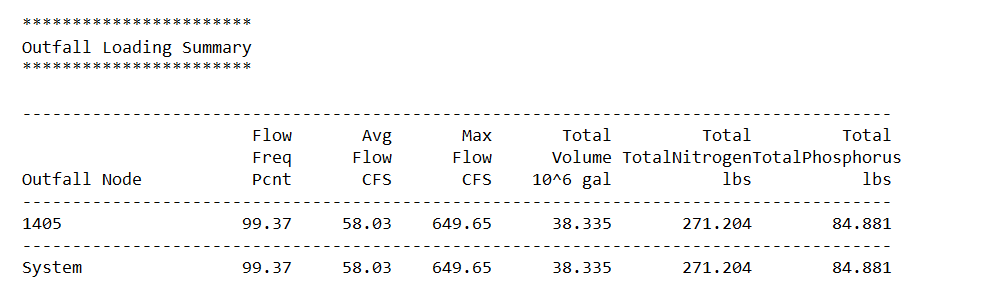

In [ ]:
# Outfall
reportColumns = [str(i) for i in np.arange(0,15)]
rpt_1405 = pd.read_csv(r'C:\Users\estep\Desktop\s21\ce4991\MeadowCreekSWMM\SWMM_Altered_Inputs\Meadow_Creek_Hydrology_Model_UpdatedMar2021_Adjusted_SB_Parameters.txt', skiprows = 37646, nrows = 1, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_1405.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_1405.rename(columns = {'0':'Outfall Node','6':'Flow Freq %','7':'Avg Flow (CFS)','8':'Max Flow (CFS)','10':'Total Volume (10^6 Gallons)','12':'Total Nitrogen Load (lbs)','14':'Total Phosphorous (lbs)'},inplace = True)

In [ ]:
rpt_1405.head()